_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Rousseau Firmin
 - Meetoo Anya

## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1790).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [138]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [139]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp1/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example
</div>
<!-- Question End -->

In [140]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


In [141]:
print("shape X : ",np.shape(X))
print("shape Y : ",np.shape(Y))
print("ground truth 10th element : ",Y[9])

shape X :  (308, 6)
shape Y :  (308,)
ground truth 10th element :  1.83


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

In the dataset, there are :
- 308 examples
- each with 6 features 

The ground of truth for the 10th element is 1.83

</div>
<!-- Answer Section End -->

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
The following command adds a column to the inputs.

- what is in the value added this column?
- why are we doing this?
</div>
<!-- Question End -->

In [142]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)

           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

On ajoute des 1 ????????????????


We are adding a feature (7th column)




</div>
<!-- Answer Section End -->

## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples
</div>
<!-- Question End -->

In [143]:
w = np.ones(np.shape(X)[1]) 

def h(w, x):
    #m=x*w
    #s=np.sum(m)
    
    #s = w @ x # dot product of w and x
    return np.dot(x, w)
x = np.array([1,    2,   3,  4,  5, 6, 7])
print(h(w, x))
w = np.zeros(np.shape(X)[1])
# print the ground truth and the evaluation of h_w on the first example

28.0


## Loss function
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.
</div>
<!-- Question End -->

In [144]:
# slide 13/35 of perceptron slides
def loss(w, x, y):
    h_w=h(w, x) 
    l = (h_w - y)**2
    return l 

print(loss(w, X[0], Y[0]))

74.30439999999999


## Empirical loss
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.
</div>
<!-- Question End -->

In [145]:

def emp_loss(w, X, Y):
    s=0
    cardinal=np.shape(X)[0]
    for i in range(cardinal):
       s+=loss(w,X[i],Y[i])
    s=s/cardinal
    
    return s
    
w=np.zeros(np.shape(X)[1])
#print(h(w,X[1]))
print(emp_loss(w, X, Y))

339.2467464285712


## Gradient update

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slide 18 of the perceptron lecture slides for an example)
</div>
<!-- Question End -->

In [146]:
def compute_update(w, X, Y, alpha):
    
    # Pour chaque feature qui existe (dans notre cas 7 features)
    for i in range(np.shape(w)[0]):# i <= 7
        # Pour chaque exemple (dans notre cas 308 exemples)
        for j in range(np.shape(X)[0]):# j <= 308 
            # difference entre la prediction et la valeur réelle
            diff = Y[j]-h(w,X[j])
            # on cherche la valeur du feature i de cette exemple j
            value = X[j,i]
            # on met à jour le poids w[i] en fonction de la valeur du feature i de l'exemple j
            w[i] += alpha * diff * value
    return w

w=np.zeros(np.shape(X)[1])
compute_update(w, X, Y, alpha = 10e-7)

array([ 0.0032321 , -0.00755252,  0.00181674,  0.01539221,  0.01254906,
        0.01020634,  0.00129417])

## Gradient descent
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights
</div>
<!-- Question End -->

In [147]:
def descent(w_init, X, Y, alpha, max_iter):
    iter=0
    w=w_init
    emp=[]
    imm = False
    while iter<max_iter :
        w=compute_update(w, X, Y, alpha)
        e=emp_loss(w,X,Y)
        print("Iter: ", iter, " Empiric loss : ", e)
        iter+=1
        emp.append(e)
    return w,emp

## Exploitation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?
</div>
<!-- Question End -->

In [148]:
w=np.zeros(np.shape(X)[1])
w,emp = descent(w, X, Y, alpha=10e-5, max_iter=10000)

assert(len(emp)>5)
print(w)

Iter:  0  Empiric loss :  233.95634599244843
Iter:  1  Empiric loss :  231.09069646950093
Iter:  2  Empiric loss :  230.81346837951807
Iter:  3  Empiric loss :  230.5352296900207
Iter:  4  Empiric loss :  230.26285351622775
Iter:  5  Empiric loss :  230.00916695351415
Iter:  6  Empiric loss :  229.77462294864958
Iter:  7  Empiric loss :  229.55739104947375
Iter:  8  Empiric loss :  229.35546652353693
Iter:  9  Empiric loss :  229.16701695820424
Iter:  10  Empiric loss :  228.99041792575073


Iter:  11  Empiric loss :  228.82423785622416
Iter:  12  Empiric loss :  228.6672167124055
Iter:  13  Empiric loss :  228.5182458246104
Iter:  14  Empiric loss :  228.37634988469867
Iter:  15  Empiric loss :  228.2406710386144
Iter:  16  Empiric loss :  228.1104548622609
Iter:  17  Empiric loss :  227.9850380031812
Iter:  18  Empiric loss :  227.8638372915014
Iter:  19  Empiric loss :  227.74634014604587
Iter:  20  Empiric loss :  227.63209612201715
Iter:  21  Empiric loss :  227.52070946479807
Iter:  22  Empiric loss :  227.4118325504823
Iter:  23  Empiric loss :  227.30516010788065
Iter:  24  Empiric loss :  227.2004241292216
Iter:  25  Empiric loss :  227.09738938776832
Iter:  26  Empiric loss :  226.9958494902556
Iter:  27  Empiric loss :  226.89562340060246
Iter:  28  Empiric loss :  226.79655237889415
Iter:  29  Empiric loss :  226.69849728625866
Iter:  30  Empiric loss :  226.60133621212535
Iter:  31  Empiric loss :  226.5049623855131
Iter:  32  Empiric loss :  226.4092823365443

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

Training the model :
- We use the gradient descent algorithm while changing the alpha and max_iter values
- We used alpha=10e-5, max_iter=10000, the values converged rapidly in the beginning and slowly at the end

The final loss for this model is 81.57976495962644 

It is not the most optimal one for a perceptron as : 


</div>
<!-- Answer Section End -->

[15.173619595590992, -5.301198092230834, -6.935721670806402, 12.309459110864964, 1.640225477862998, 6.4973049678634425, 31.96116719297234, -2.7538391535015307, 13.805290788852716, 6.155443846673222, 23.76610104976902, 7.6166198042139115, -4.85224678290237, 21.661069887180105, 0.8140793266545359, 24.950924666645847, -4.632983551956613, 22.397772243030772, 1.8882988347618834, 1.6567597833716263]


<>:10: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_13950/1667186010.py:10: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')


Text(0, 0.5, 'f(examples)')

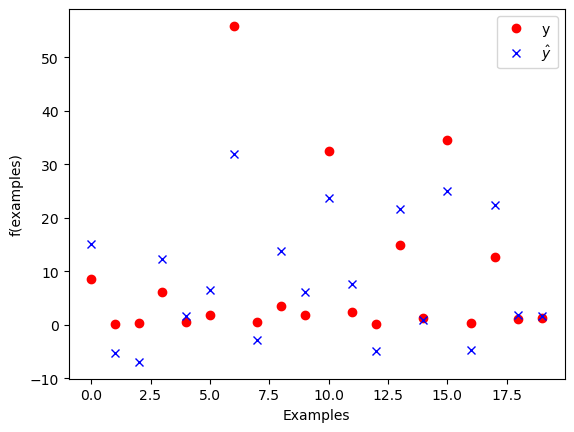

In [149]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
import matplotlib.pyplot as plt
num_samples_to_plot = 20
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')



yw = [h(w,x) for x in X[0:num_samples_to_plot]]
print(yw)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")






# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?
</div>
<!-- Question End -->


### Improvements to gradient descent

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations
</div>
<!-- Question End -->


In [171]:
# Method SGD 
def sgd(w_init, X, Y, alpha, max_iter):
    
    id_rand = np.random.choice(len(X),size=len(X)//2, replace=False)
    X_rand = X[id_rand]
    Y_rand = Y[id_rand]
    
    iter=0
    w=w_init
    emp=[]
    imm = False
    while iter<max_iter and not imm:
        w = compute_update(w, X_rand, Y_rand, alpha)
        e = emp_loss(w,X,Y)
        print("Iter: ", iter, " Empiric loss : ", e)
        
        iter+=1
        if iter > 1 and (e-emp[-1] < 10e-50):
            imm = False
    
        emp.append(e)
        
    return w,emp

# New descent with SGD
w=np.zeros(np.shape(X)[1])
w,emp = sgd(w, X, Y, alpha=10e-5, max_iter=20000)

Iter:  0  Empiric loss :  249.67669075886272
Iter:  1  Empiric loss :  233.92170914459632
Iter:  2  Empiric loss :  231.0455087546636
Iter:  3  Empiric loss :  230.42144708789527
Iter:  4  Empiric loss :  230.1969558970848
Iter:  5  Empiric loss :  230.04879330655825
Iter:  6  Empiric loss :  229.92011993127878
Iter:  7  Empiric loss :  229.80052759194228
Iter:  8  Empiric loss :  229.68775454934203
Iter:  9  Empiric loss :  229.58101434394277
Iter:  10  Empiric loss :  229.47982153154595
Iter:  11  Empiric loss :  229.38377629315593
Iter:  12  Empiric loss :  229.29251953899708
Iter:  13  Empiric loss :  229.20572047050467
Iter:  14  Empiric loss :  229.12307152242482
Iter:  15  Empiric loss :  229.04428556789344
Iter:  16  Empiric loss :  228.9690940493993
Iter:  17  Empiric loss :  228.8972455608864
Iter:  18  Empiric loss :  228.82850467352847
Iter:  19  Empiric loss :  228.76265090629028
Iter:  20  Empiric loss :  228.6994777926028
Iter:  21  Empiric loss :  228.63879201855377
Ite

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
X_normalized[:,0]=np.ones(np.shape(X)[0])
w=np.zeros(np.shape(X_normalized)[1])
w,emp_norm = descent(w, X_normalized, Y, alpha=10e-5, max_iter=10000)

Iter:  0  Empiric loss :  323.65571186164823
Iter:  1  Empiric loss :  308.9968637768693
Iter:  2  Empiric loss :  295.2144611868596
Iter:  3  Empiric loss :  282.25609675979734
Iter:  4  Empiric loss :  270.072497393898
Iter:  5  Empiric loss :  258.61733672658136
Iter:  6  Empiric loss :  247.847058863683
Iter:  7  Empiric loss :  237.72071265687114
Iter:  8  Empiric loss :  228.1997958977243
Iter:  9  Empiric loss :  219.24810883474535
Iter:  10  Empiric loss :  210.83161645516776
Iter:  11  Empiric loss :  202.91831900685946
Iter:  12  Empiric loss :  195.47813026704986
Iter:  13  Empiric loss :  188.4827630941661
Iter:  14  Empiric loss :  181.905621826833
Iter:  15  Empiric loss :  175.7217011202106
Iter:  16  Empiric loss :  169.90749083438473
Iter:  17  Empiric loss :  164.44088661259642
Iter:  18  Empiric loss :  159.3011058088003
Iter:  19  Empiric loss :  154.46860844441366
Iter:  20  Empiric loss :  149.9250228933098
Iter:  21  Empiric loss :  145.65307601210554
Iter:  22  

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**







</div>
<!-- Answer Section End -->

Text(0, 0.5, 'f(examples)')

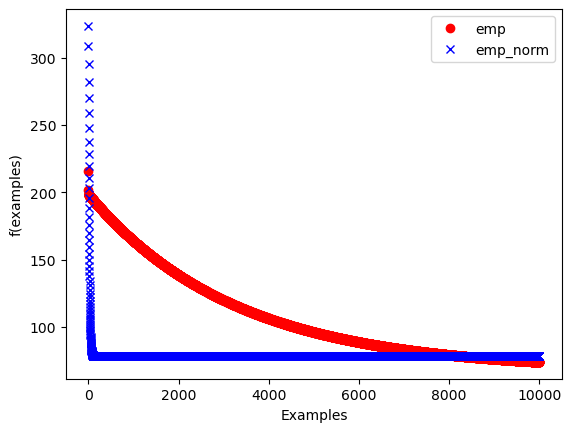

In [170]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
import matplotlib.pyplot as plt
plt.plot(np.array(emp), 'ro', label='emp')

plt.plot(np.array(emp_norm), 'bx', label='emp_norm')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")